   # Shinnar-Le Roux RF Pulse Design with SigPy

In [1]:
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
import scipy.signal as signal
%matplotlib notebook

   ## Parameters for a time-bandwidth 4, linear-phase excitation

In [2]:
tb = 4
N = 128
d1 = 0.01
d2 = 0.01
ptype = 'ex'
ftype = 'ls'

   ## Design the excitation pulse

<IPython.core.display.Javascript object>


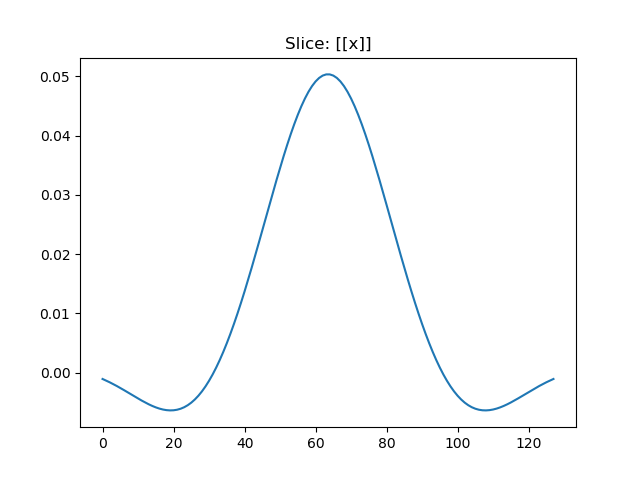

In [3]:
rf = mr.rf.dzrf(N,tb,ptype,ftype,d1,d2)
pl.LinePlot(rf,mode='r')

## Simulate the excitation pulse's Mxy profile

<IPython.core.display.Javascript object>


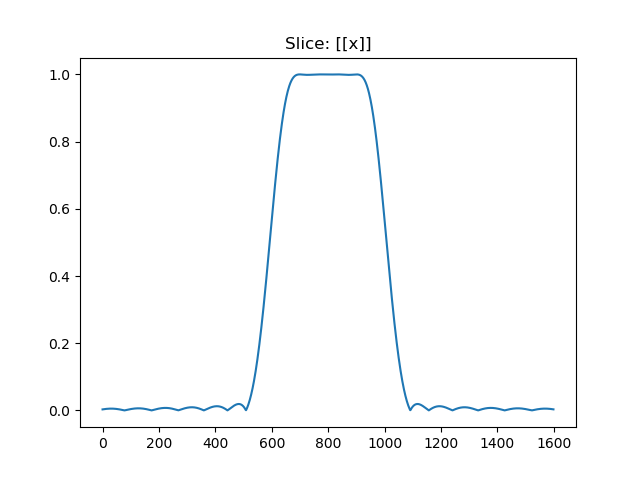

In [4]:
[a, b] = mr.rf.abrm(rf,np.arange(-2*tb,2*tb,0.01))
Mxy = 2*np.multiply(np.conj(a),b)
pl.LinePlot(Mxy.T)

<IPython.core.display.Javascript object>


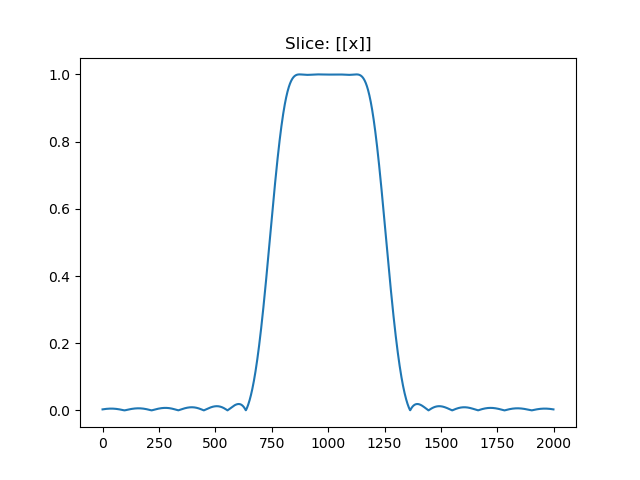

In [5]:
Nfreqs = 2000
mInit = np.repeat([[0, 0, 1]], Nfreqs, axis=0)
dt = 1
f0 = np.linspace(-2*tb/(N),2*tb/(N),Nfreqs)
t1 = np.full(Nfreqs, np.infty)
t2 = np.full(Nfreqs, np.infty)
mFinal = mr.bloch_forward(mInit, rf, f0, t1, t2, dt)
pl.LinePlot(mFinal[:,0]+1j*mFinal[:,1],mode='m')

## Parameters for a time-bandwidth 8, minimum-phase inversion

In [6]:
tb = 8
N = 128
d1 = 0.01
d2 = 0.01
ptype = 'inv'
ftype = 'min'

## Design the inversion pulse

<IPython.core.display.Javascript object>


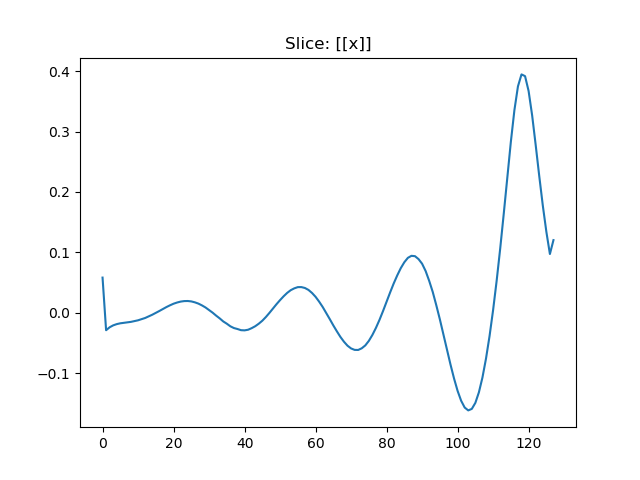

In [7]:
rf = mr.rf.dzrf(N,tb,ptype,ftype,d1,d2)
pl.LinePlot(rf,mode='r')

## Simulate the inversion pulse's Mz profile

<IPython.core.display.Javascript object>


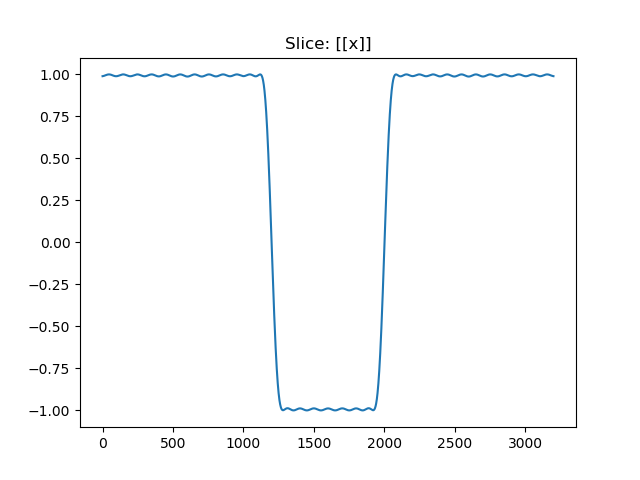

(3200,)


In [8]:
[a, b] = mr.rf.abrm(rf,np.arange(-2*tb,2*tb,0.01))
Mz = 1-2*np.abs(b)**2
pl.LinePlot(Mz.T,mode='r')
print(np.shape(Mz))

In [ ]:
Nfreqs = 2000
mInit = np.repeat([[0, 0, 1]], Nfreqs, axis=0)
dt = 1
f0 = np.linspace(-2*tb/(N),2*tb/(N),Nfreqs)
t1 = np.full(Nfreqs, np.infty)
t2 = np.full(Nfreqs, np.infty)
mFinal = mr.bloch_forward(mInit, rf, f0, t1, t2, dt)
pl.LinePlot(mFinal[:,2],mode='r')